<a href="https://colab.research.google.com/github/pommland/MinorClass_ML/blob/main/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Australia Weather

## Data Description
| Variable | Definition |
| -------- | ---------- |
| Date | The date of observation |
| Location | The common name of the location of the weather station |
| MinTemp | The minimum temperature in degrees celsius |
| MaxTemp | The maximum temperature in degrees celsius |
| Sunshine | The number of hours of bright sunshine in the day |
| WindDir9am | Direction of the wind at 9am |
| WindSpeed9am | Wind speed (km/hr) averaged over 10 minutes prior to 9am |
| Humidity9am | Humidity (percent) at 9am |
| Pressure9am | Atmospheric pressure (hpa) reduced to mean sea level at 9am |
| Cloud9am | Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many |
| Temp9am | Temperature (degrees C) at 9am |

### Target Variable
- RainToday (Yes, No)

## Objective
- Clean ค่า null ถ้า column ไหนมี null มากกว่า 40% ให้แทนค่า null ด้วยค่า mean ของ column นั้นๆ
- สร้าง classification model เพื่อทำนาย RainToday

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn import tree
from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ปี 2 เทอม 2 ปอม/AI_2021/ML/Assignment5/weather_data_prepared.csv")

In [ ]:
print(df.head())

         Date Location  MinTemp  ...  Cloud9am  Temp9am RainToday
0  2008-12-01   Albury     13.4  ...       8.0     16.9        No
1  2008-12-02   Albury      7.4  ...       NaN     17.2        No
2  2008-12-03   Albury     12.9  ...       NaN     21.0        No
3  2008-12-04   Albury      9.2  ...       NaN     18.1        No
4  2008-12-05   Albury     17.5  ...       7.0     17.8        No

[5 rows x 12 columns]


In [ ]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          145460 non-null  object 
 1   Location      145460 non-null  object 
 2   MinTemp       143975 non-null  float64
 3   MaxTemp       144199 non-null  float64
 4   Sunshine      75625 non-null   float64
 5   WindDir9am    134894 non-null  object 
 6   WindSpeed9am  143693 non-null  float64
 7   Humidity9am   142806 non-null  float64
 8   Pressure9am   130395 non-null  float64
 9   Cloud9am      89572 non-null   float64
 10  Temp9am       143693 non-null  float64
 11  RainToday     142199 non-null  object 
dtypes: float64(8), object(4)
memory usage: 13.3+ MB
None
(145460, 12)


In [ ]:
df.describe()

,MinTemp,MaxTemp,Sunshine,WindSpeed9am,Humidity9am,Pressure9am,Cloud9am,Temp9am
count,143975.000000,144199.000000,75625.000000,143693.000000,142806.000000,130395.00000,89572.000000,143693.000000
mean,12.194034,23.221348,7.611178,14.043426,68.880831,1017.64994,4.447461,16.990631
std,6.398495,7.119049,3.785483,8.915375,19.029164,7.10653,2.887159,6.488753
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,980.50000,0.000000,-7.200000
25%,7.600000,17.900000,4.800000,7.000000,57.000000,1012.90000,1.000000,12.300000
50%,12.000000,22.600000,8.400000,13.000000,70.000000,1017.60000,5.000000,16.700000
75%,16.900000,28.200000,10.600000,19.000000,83.000000,1022.40000,7.000000,21.600000
max,33.900000,48.100000,14.500000,130.000000,100.000000,1041.00000,9.000000,40.200000


In [ ]:
df

,Date,Location,MinTemp,MaxTemp,Sunshine,WindDir9am,WindSpeed9am,Humidity9am,Pressure9am,Cloud9am,Temp9am,RainToday
0,2008-12-01,Albury,13.4,22.9,NaN,W,20.0,71.0,1007.7,8.0,16.9,No
1,2008-12-02,Albury,7.4,25.1,NaN,NNW,4.0,44.0,1010.6,NaN,17.2,No
2,2008-12-03,Albury,12.9,25.7,NaN,W,19.0,38.0,1007.6,NaN,21.0,No
3,2008-12-04,Albury,9.2,28.0,NaN,SE,11.0,45.0,1017.6,NaN,18.1,No
4,2008-12-05,Albury,17.5,32.3,NaN,ENE,7.0,82.0,1010.8,7.0,17.8,No
...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,NaN,SE,13.0,51.0,1024.6,NaN,10.1,No
145456,2017-06-22,Uluru,3.6,25.3,NaN,SE,13.0,56.0,1023.5,NaN,10.9,No
145457,2017-06-23,Uluru,5.4,26.9,NaN,SE,9.0,53.0,1021.0,NaN,12.5,No
145458,2017-06-24,Uluru,7.8,27.0,NaN,SSE,13.0,51.0,1019.4,3.0,15.1,No


In [ ]:
totalday = 145460 #cheack from rows of Date
df['Date'] = [day for day in range(1,totalday+1)] #change Date time to int


In [ ]:


unique_list = pd.unique(df["Location"])
country_code =[x for x in range(len(unique_list))]  #Change Country(String) to Country(int)

for i in range(len(unique_list)): 
  print("Country:   {:20} will replace to code  : {}".format(unique_list[i],country_code[i]))
df.replace(unique_list, country_code, inplace=True)


Country:   Albury               will replace to code  : 0
Country:   BadgerysCreek        will replace to code  : 1
Country:   Cobar                will replace to code  : 2
Country:   CoffsHarbour         will replace to code  : 3
Country:   Moree                will replace to code  : 4
Country:   Newcastle            will replace to code  : 5
Country:   NorahHead            will replace to code  : 6
Country:   NorfolkIsland        will replace to code  : 7
Country:   Penrith              will replace to code  : 8
Country:   Richmond             will replace to code  : 9
Country:   Sydney               will replace to code  : 10
Country:   SydneyAirport        will replace to code  : 11
Country:   WaggaWagga           will replace to code  : 12
Country:   Williamtown          will replace to code  : 13
Country:   Wollongong           will replace to code  : 14
Country:   Canberra             will replace to code  : 15
Country:   Tuggeranong          will replace to code  : 16
Country

In [ ]:

direction_list = []
for i in ((pd.unique(df["WindDir9am"]))):
  if type(i) != float: #Null data is type <float> อันเดียว ในคอลลัม นอกเหนือเป็น สตริง
      direction_list.append(i)
direction_code = [x for x in range(len(direction_list))]

for i in range(len(direction_list)): 
  print("Direction of Wind at 9 AM :   {:10} will replace to code  : {}".format(direction_list[i],direction_code[i]))
df.replace(direction_list, direction_code, inplace=True)



Direction of Wind at 9 AM :   W          will replace to code  : 0
Direction of Wind at 9 AM :   NNW        will replace to code  : 1
Direction of Wind at 9 AM :   SE         will replace to code  : 2
Direction of Wind at 9 AM :   ENE        will replace to code  : 3
Direction of Wind at 9 AM :   SW         will replace to code  : 4
Direction of Wind at 9 AM :   SSE        will replace to code  : 5
Direction of Wind at 9 AM :   S          will replace to code  : 6
Direction of Wind at 9 AM :   NE         will replace to code  : 7
Direction of Wind at 9 AM :   SSW        will replace to code  : 8
Direction of Wind at 9 AM :   N          will replace to code  : 9
Direction of Wind at 9 AM :   WSW        will replace to code  : 10
Direction of Wind at 9 AM :   ESE        will replace to code  : 11
Direction of Wind at 9 AM :   E          will replace to code  : 12
Direction of Wind at 9 AM :   NW         will replace to code  : 13
Direction of Wind at 9 AM :   WNW        will replace to c

In [ ]:
df.replace(['Yes', 'No'], [1, 0], inplace=True) #Replace Target Value

In [ ]:
for i in df:
  print(f"column : {i} _ percent of null =  {df[i].isnull().sum()/totalday*100} %")

column : Date _ percent of null =  0.0 %
column : Location _ percent of null =  0.0 %
column : MinTemp _ percent of null =  1.0208992162793895 %
column : MaxTemp _ percent of null =  0.8669049910628353 %
column : Sunshine _ percent of null =  48.00976213391998 %
column : WindDir9am _ percent of null =  7.263852605527293 %
column : WindSpeed9am _ percent of null =  1.214766946239516 %
column : Humidity9am _ percent of null =  1.8245565791282825 %
column : Pressure9am _ percent of null =  10.356799120033 %
column : Cloud9am _ percent of null =  38.42155919153032 %
column : Temp9am _ percent of null =  1.214766946239516 %
column : RainToday _ percent of null =  2.2418534304963567 %


In [ ]:
#Replace  data in "Sunshine" columns  because Null more than 40 percent
df['Sunshine'] = df['Sunshine'].fillna(df["Sunshine"].mean())

In [ ]:
df['WindDir9am'] = df['WindDir9am'].fillna(0)
df['Cloud9am'] = df['Cloud9am'].fillna(0)
df['RainToday'] = df['RainToday'].fillna(0)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          145460 non-null  int64  
 1   Location      145460 non-null  int64  
 2   MinTemp       143975 non-null  float64
 3   MaxTemp       144199 non-null  float64
 4   Sunshine      145460 non-null  float64
 5   WindDir9am    145460 non-null  float64
 6   WindSpeed9am  143693 non-null  float64
 7   Humidity9am   142806 non-null  float64
 8   Pressure9am   130395 non-null  float64
 9   Cloud9am      145460 non-null  float64
 10  Temp9am       143693 non-null  float64
 11  RainToday     145460 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 13.3 MB
None


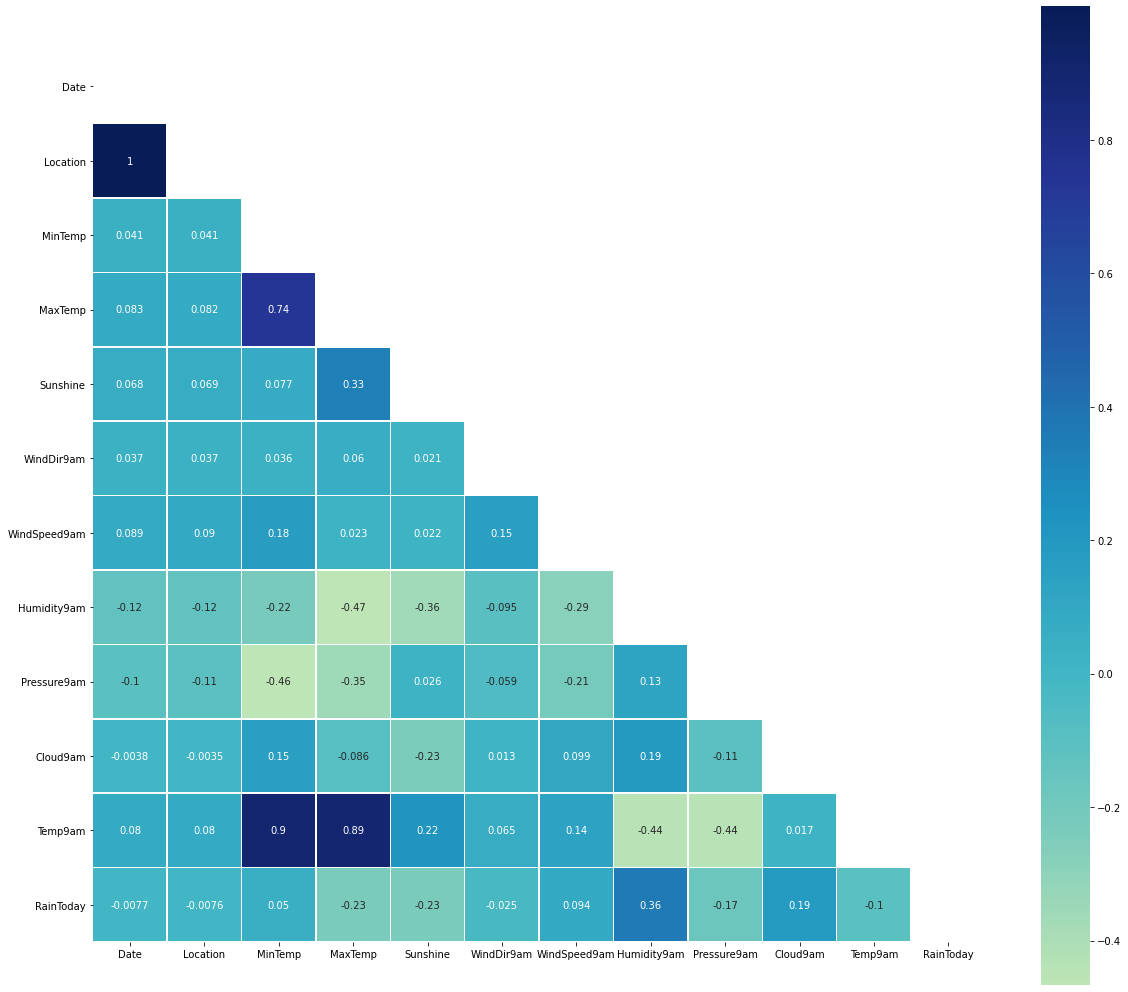

In [ ]:
corr = df.corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap="YlGnBu", center=0,
            square=True, linewidths=.5)

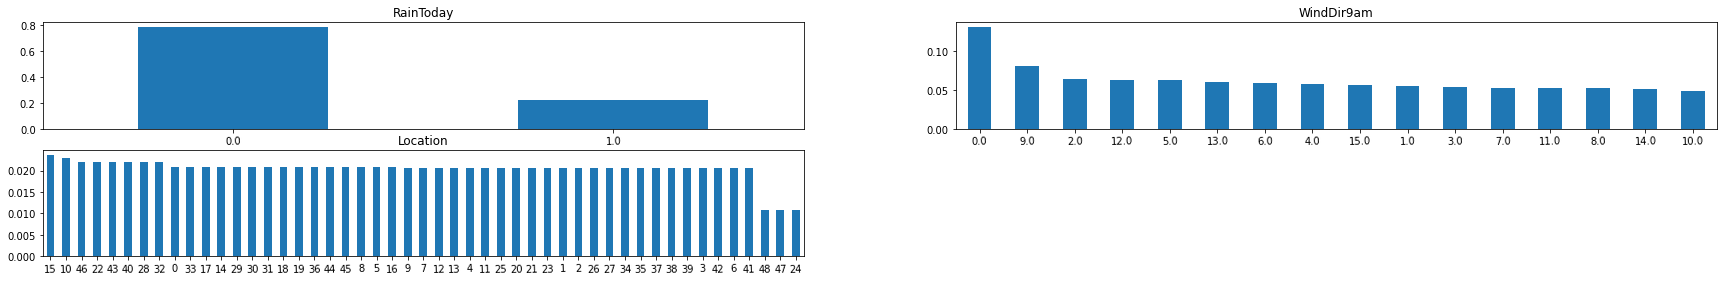

In [ ]:
plt.figure(figsize=(30,9))
plt.subplot(421) 
df['RainToday'].value_counts(normalize=True).plot.bar(title= 'RainToday',rot=2) 
plt.subplot(422) 
df['WindDir9am'].value_counts(normalize=True).plot.bar(title= 'WindDir9am',rot=2) 
plt.subplot(423) 
df['Location'].value_counts(normalize=True).plot.bar(title= 'Location',rot=2)
#data dont need to Resampling Technique (imbalance)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

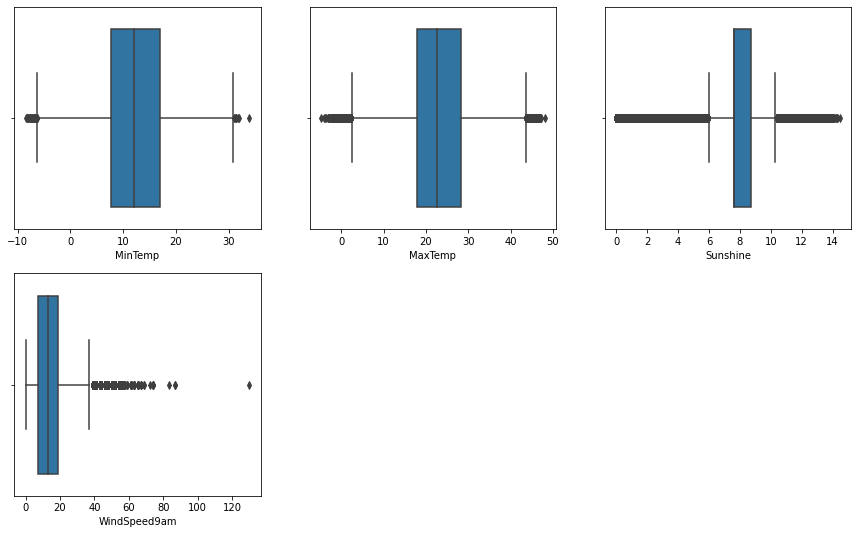

In [ ]:
plt.figure(figsize=(15,9))
plt.subplot(231) 
a = sns.boxplot(df['MinTemp'])
plt.subplot(232) 
a = sns.boxplot(df['MaxTemp'])
plt.subplot(233) 
a = sns.boxplot(df['Sunshine'])
plt.subplot(234) 
a = sns.boxplot(df['WindSpeed9am'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

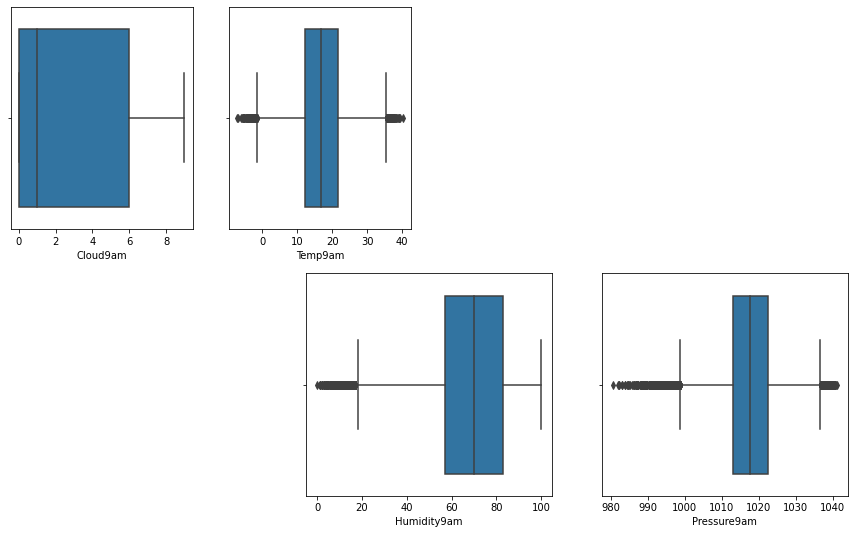

In [ ]:
plt.figure(figsize=(15,9))
plt.subplot(235) 
a = sns.boxplot(df['Humidity9am'])
plt.subplot(236) 
a = sns.boxplot(df['Pressure9am'])
plt.subplot(241) 
a = sns.boxplot(df['Cloud9am'])
plt.subplot(242) 
a = sns.boxplot(df['Temp9am'])

In [ ]:
outlier_list = ["MinTemp","MaxTemp","Sunshine","WindSpeed9am","Temp9am","Humidity9am","Pressure9am"] 
for i in outlier_list :
  cal_Q1 = df[i].quantile(0.25)
  cal_Q3 = df[i].quantile(0.75)
  cal_IQR = cal_Q3 - cal_Q1
  cal_IQR

  lower_limit = cal_Q1 - 1.5 * cal_IQR
  upper_limit = cal_Q3 + 1.5 * cal_IQR

  df = df[(df[i] > lower_limit)&(df[i] < upper_limit)]
  df[i]

In [ ]:
X = df.drop('RainToday', axis=1)
y = df.RainToday

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

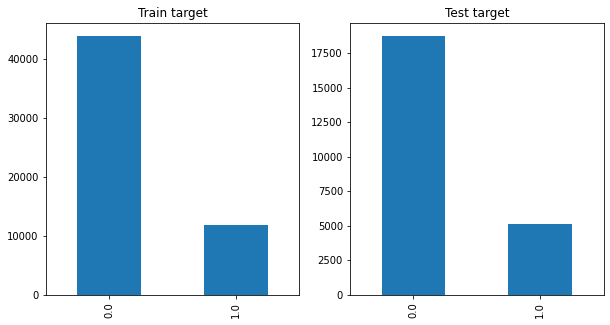

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Train target')
y_train_under.value_counts().plot(kind='bar')
plt.subplot(122)
plt.title('Test target')
y_test_under.value_counts().plot(kind='bar')

In [ ]:
df.isna().sum()

Date            0
Location        0
MinTemp         0
MaxTemp         0
Sunshine        0
WindDir9am      0
WindSpeed9am    0
Humidity9am     0
Pressure9am     0
Cloud9am        0
Temp9am         0
RainToday       0
dtype: int64

In [ ]:
k = 5

clf_knn = KNeighborsClassifier(n_neighbors=k)
clf_knn = clf_knn.fit(x_train, y_train) 

knn_y_pred = clf_knn.predict(x_test)

print(f'Test data accuracy score (K = {k}): {np.round(clf_knn.score(x_test, y_test), 2)*100}%')



Test data accuracy score (K = 5): 81.0%


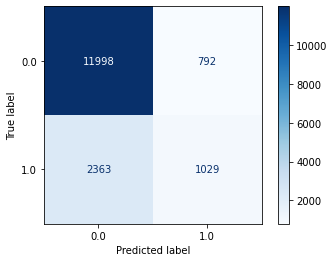

In [ ]:
plot_confusion_matrix(clf_knn, x_test, y_test, cmap='Blues', values_format='d')

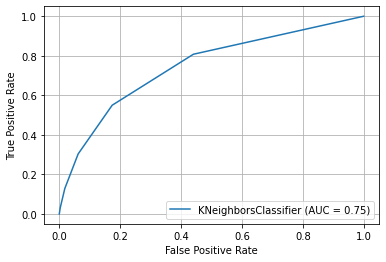

In [ ]:
# Plot ROC curve
plot_roc_curve(clf_knn, x_test, y_test)
plt.grid()